## Imports

In [1]:
import edit.data

## Variables

In [2]:
var = 'tcwv'

## Builtin Operations
`edit.data` provides a couple useful operations which can be applied to any `DataIndex`, 

As of the writing of this Notebook, the following operations are accessible from the `DataIndex`
- Range
- Aggreagtion

Other operations are also implemented, and accessible at `edit.data.operations`

In [3]:
era5 = edit.data.archive.ERA5(var, level = 'single')

## Range of Data
Lets find the range of data in March 2021, with data retrieved at hourly intervals

In [5]:
era5.range('2021-03-01', '2021-04-01', interval = (60, 'minutes'))

{'tcwv': {'max': 78.36717224121094, 'min': 0.0693817138671875}}

## Aggregation
Lets find the temporal mean of data in March 2021, with data retrieved at 6 hourly intervals

In [6]:
era5.aggregation('2021-03-01', '2021-04-01',  interval = (6, 'hour'), aggregation = 'mean')

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    tcwv       (latitude, longitude) float32 dask.array<chunksize=(253, 506), meta=np.ndarray>
Attributes:
    Aggregation:  Aggregation mean from 2021-03-01 to 2021-04-01 at 0 days 06...

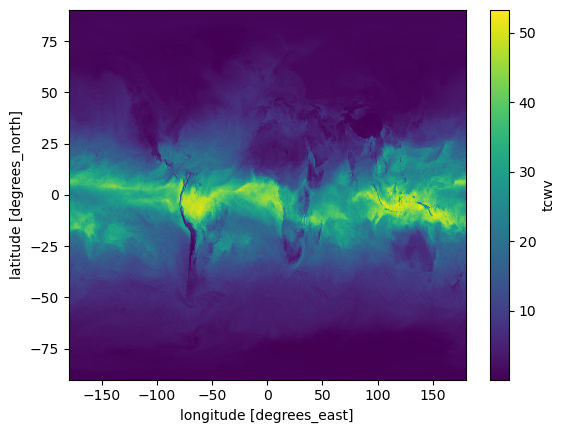

In [7]:
era5.aggregation('2021-03-01', '2021-04-01',  interval = (6, 'hour'), aggregation = 'min').tcwv.plot()

## Percentiles
As there is no clear way to find percentiles with `xarray.Dataset`, a custom function is provided.
It can retrieve any number of percentiles when given a Dataset

In [8]:
edit.data.operations.percentile(era5('2021-01-01'), [1,5,95,99])

<xarray.Dataset>
Dimensions:     (Percentile: 4)
Coordinates:
  * Percentile  (Percentile) int64 1 5 95 99
Data variables:
    tcwv        (Percentile) float64 0.4732 0.7271 52.75 60.32